<a href="https://colab.research.google.com/github/dariabokareva/datascience/blob/master/neural-networks/fashion_mnist/fashion_mnist_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Применение нейронной сети для распознавания изображений моделей одежды

In [1]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [20]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загрузка предварительно обученной нейронной сети

In [8]:
!wget https://github.com/dariabokareva/datascience/raw/master/neural-networks/fashion_mnist/fashion_mnist_dense.h5 -O fashion_mnist_dense.h5

--2022-07-03 17:35:11--  https://github.com/dariabokareva/datascience/raw/master/neural-networks/fashion_mnist/fashion_mnist_dense.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dariabokareva/datascience/master/neural-networks/fashion_mnist/fashion_mnist_dense.h5 [following]
--2022-07-03 17:35:11--  https://raw.githubusercontent.com/dariabokareva/datascience/master/neural-networks/fashion_mnist/fashion_mnist_dense.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5113264 (4.9M) [application/octet-stream]
Saving to: ‘fashion_mnist_dense.h5’

fashion_mnist_dense 100%[===================>]   4

In [9]:
model = load_model('fashion_mnist_dense.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


## Загрузка в Colab изображения для распознавания

In [22]:
f = files.upload()

Saving t-shirt-man.jpg to t-shirt-man.jpg


In [23]:
!ls

fashion_mnist_dense.h5	sample_data  t-shirt-blue.jpg  t-shirt-man.jpg


In [31]:
img_path = 't-shirt-blue.jpg'

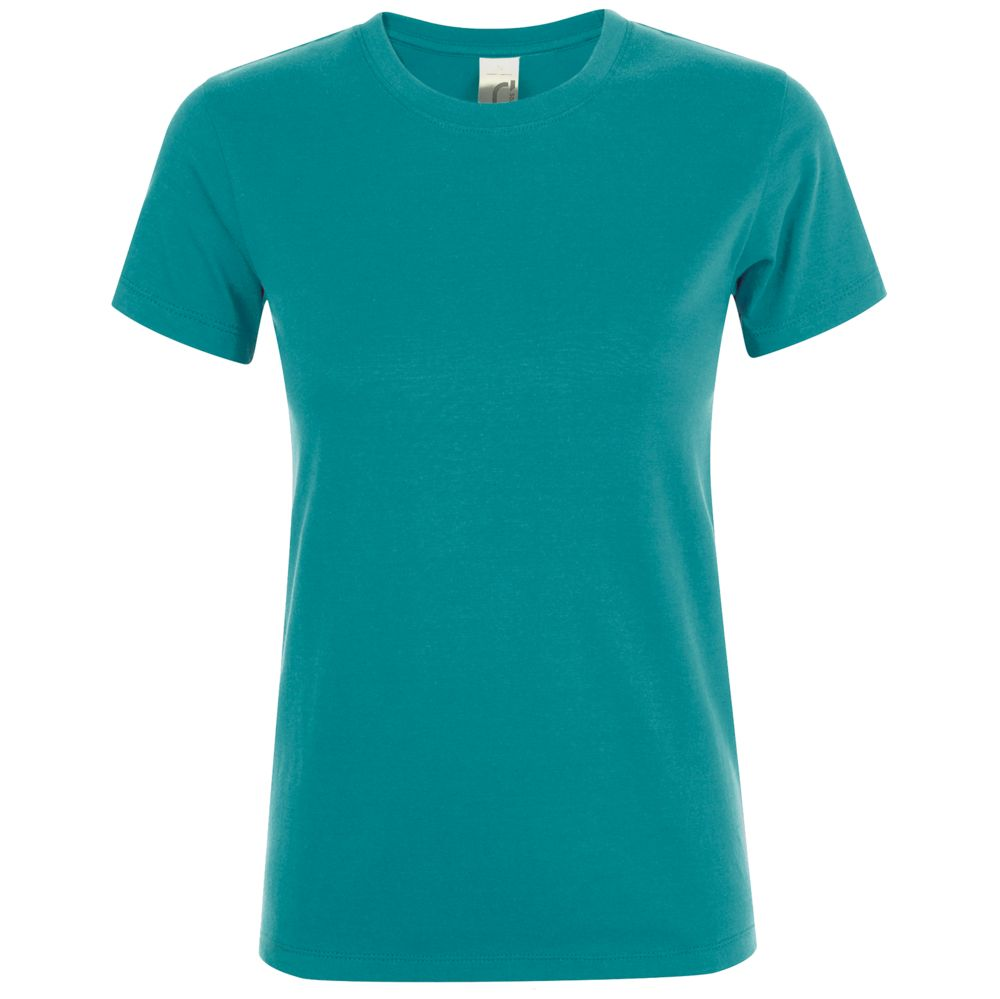

In [32]:
Image(img_path, width=150, height=150)

## Распознавание изображения

Загружаем изображение из файла с помощью инструментов Keras

In [33]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [34]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запуск распознавания

In [35]:
prediction = model.predict(x)

Результаты

In [36]:
prediction

array([[9.9998891e-01, 6.9258414e-18, 6.5217200e-14, 1.0967985e-05,
        1.3770213e-17, 1.9459374e-25, 7.9279815e-08, 3.4240677e-27,
        1.5258877e-17, 5.3095289e-29]], dtype=float32)

In [37]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 0
Название класса: футболка
